In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\employee_performance_ml_dataset.csv")

In [3]:
df.head()

,EmployeeID,Age,Experience,MonthlyIncome,Department,EducationLevel,WorkLocation,PerformanceScore
0,5001,31.0,33.0,91277.0,IT,Graduate,Hybrid,63.6277
1,5002,37.0,33.0,33299.0,IT,Post-Graduate,Remote,53.8299
2,5003,26.0,11.0,78566.0,NaN,NaN,Onsite,26.3566
3,5004,57.0,11.0,30879.0,NaN,Post-Graduate,NaN,21.5879
4,5005,56.0,13.0,79737.0,Sales,PhD,Hybrid,35.4737


In [4]:
df.shape

(80, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EmployeeID        80 non-null     int64  
 1   Age               79 non-null     float64
 2   Experience        79 non-null     float64
 3   MonthlyIncome     79 non-null     float64
 4   Department        63 non-null     object 
 5   EducationLevel    56 non-null     object 
 6   WorkLocation      59 non-null     object 
 7   PerformanceScore  80 non-null     float64
dtypes: float64(4), int64(1), object(3)
memory usage: 5.1+ KB


In [6]:
df.isnull().sum()

EmployeeID           0
Age                  1
Experience           1
MonthlyIncome        1
Department          17
EducationLevel      24
WorkLocation        21
PerformanceScore     0
dtype: int64

In [7]:
df.head()

,EmployeeID,Age,Experience,MonthlyIncome,Department,EducationLevel,WorkLocation,PerformanceScore
0,5001,31.0,33.0,91277.0,IT,Graduate,Hybrid,63.6277
1,5002,37.0,33.0,33299.0,IT,Post-Graduate,Remote,53.8299
2,5003,26.0,11.0,78566.0,NaN,NaN,Onsite,26.3566
3,5004,57.0,11.0,30879.0,NaN,Post-Graduate,NaN,21.5879
4,5005,56.0,13.0,79737.0,Sales,PhD,Hybrid,35.4737


In [10]:
col = ["Age","Experience","MonthlyIncome"]
df[col] = df[col].fillna(df[col].mean())

In [17]:
df.isnull().sum()

EmployeeID          0
Age                 0
Experience          0
MonthlyIncome       0
Department          0
EducationLevel      0
WorkLocation        0
PerformanceScore    0
dtype: int64

In [16]:
cat_col = ['Department','EducationLevel','WorkLocation']
for col in cat_col:
    df[col].fillna(df[col].mode()[0],inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_6500\3962767621.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)


In [18]:
df = pd.get_dummies(df, drop_first=True)
df.head()


,EmployeeID,Age,Experience,MonthlyIncome,PerformanceScore,Department_HR,Department_IT,Department_Sales,EducationLevel_PhD,EducationLevel_Post-Graduate,WorkLocation_Onsite,WorkLocation_Remote
0,5001,31.0,33.0,91277.0,63.6277,False,True,False,False,False,False,False
1,5002,37.0,33.0,33299.0,53.8299,False,True,False,False,True,False,True
2,5003,26.0,11.0,78566.0,26.3566,False,True,False,True,False,True,False
3,5004,57.0,11.0,30879.0,21.5879,False,True,False,False,True,False,True
4,5005,56.0,13.0,79737.0,35.4737,False,False,True,True,False,False,False


In [19]:
X = df.drop("PerformanceScore", axis=1)
y = df["PerformanceScore"]

In [20]:
X

,EmployeeID,Age,Experience,MonthlyIncome,Department_HR,Department_IT,Department_Sales,EducationLevel_PhD,EducationLevel_Post-Graduate,WorkLocation_Onsite,WorkLocation_Remote
0,5001,31.0,33.0,91277.0,False,True,False,False,False,False,False
1,5002,37.0,33.0,33299.0,False,True,False,False,True,False,True
2,5003,26.0,11.0,78566.0,False,True,False,True,False,True,False
3,5004,57.0,11.0,30879.0,False,True,False,False,True,False,True
4,5005,56.0,13.0,79737.0,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
75,5076,39.0,19.0,109197.0,False,True,False,True,False,False,True
76,5077,25.0,18.0,80566.0,False,True,False,False,True,False,True
77,5078,23.0,23.0,46014.0,True,False,False,True,False,False,True
78,5079,23.0,26.0,58347.0,False,True,False,True,False,False,False


In [21]:
y

0     63.6277
1     53.8299
2     26.3566
3     21.5879
4     35.4737
       ...   
75    45.4197
76    35.0566
77    41.1014
78    44.8347
79    40.6270
Name: PerformanceScore, Length: 80, dtype: float64

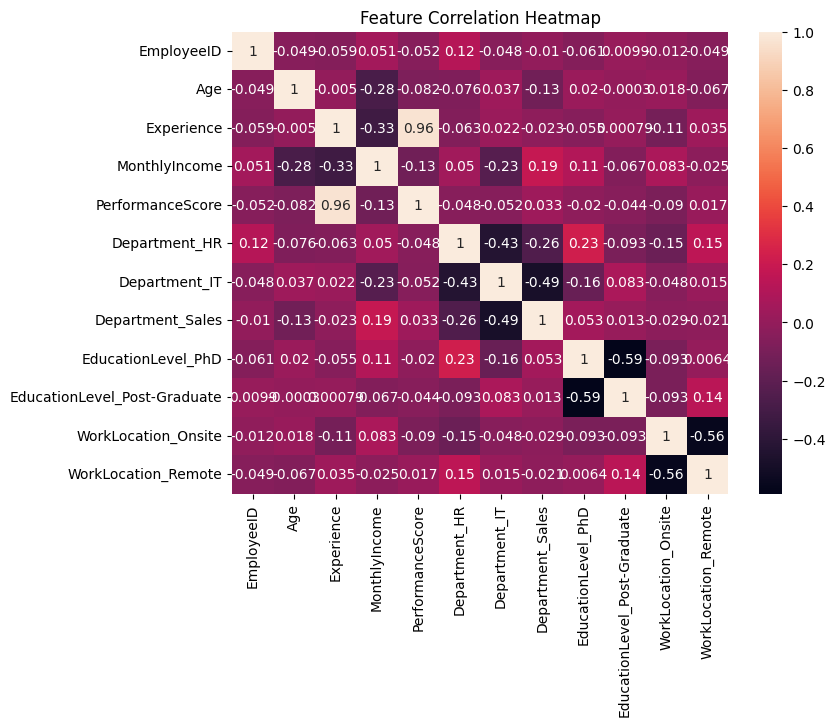

In [59]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

In [27]:
lr_pred

array([15.7277998 , 64.50687712, 34.10519162, 17.51566918, 21.70776912,
       38.8716262 , 49.05873444, 53.83576071, 33.17288255, 51.4967191 ,
       15.48062239, 53.82401572, 26.94964598, 48.56961609, 26.71832965,
       40.89068349])

In [28]:
y_class = (y > y.median()).astype(int)


In [33]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_class[:len(X_train)])
log_pred = log.predict(X_test)


In [34]:
log_pred

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1])

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_class[:len(X_train)])
dt_pred = dt.predict(X_test)


In [36]:
dt_pred

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1])

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_class[:len(X_train)])
rf_pred = rf.predict(X_test)


In [38]:
rf_pred

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1])

In [39]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_class[:len(X_train)])
knn_pred = knn.predict(X_test)


In [40]:
knn_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1])

In [41]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_class[:len(X_train)])
svm_pred = svm.predict(X_test)


In [42]:
svm_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1])

In [43]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X)


In [44]:
clusters

array([2, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2,
       1, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 1, 1, 1, 0, 1, 1, 2, 0, 1, 0, 0,
       1, 2, 2, 1, 0, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1, 1, 0,
       0, 1, 1, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0], dtype=int32)

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


In [47]:
X_pca.shape

(80, 2)

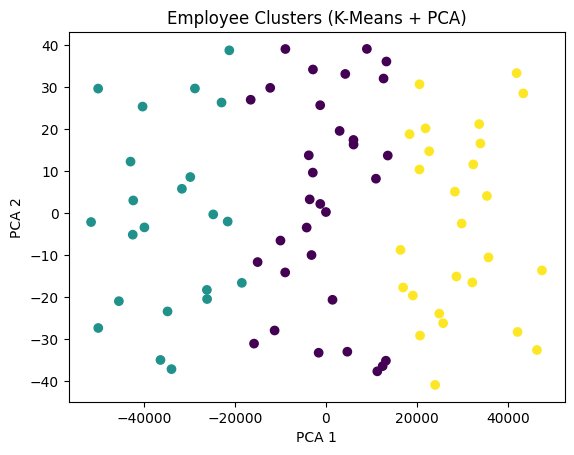

In [58]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Employee Clusters (K-Means + PCA)")
plt.show()


In [51]:

from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test, lr_pred)



13.710761389250282

In [52]:
r2_score(y_test, lr_pred)


0.9359656272599075

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_class[:len(X_test)], rf_pred)


0.4375

In [54]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf, X, y_class, cv=5).mean()


np.float64(0.9375)